In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read data and get initial impression
data=pd.read_csv('screening_exercise_orders_v201810.csv')

In [3]:
data.head()

,customer_id,gender,date,value,predicted_gender
0,1000,0,2017-01-01 00:11:31,198.5,1
1,1001,0,2017-01-01 00:29:56,338.0,1
2,1002,1,2017-01-01 01:30:31,733.0,1
3,1003,1,2017-01-01 01:34:22,772.0,1
4,1004,0,2017-01-01 03:11:54,508.0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13471 entries, 0 to 13470
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       13471 non-null  int64  
 1   gender            13471 non-null  int64  
 2   date              13471 non-null  object 
 3   value             13471 non-null  float64
 4   predicted_gender  13471 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 526.3+ KB


In [5]:
data['customer_id'].nunique()

8814

### A) Assemble a dataframe with one row per customer and the following columns:

### * customer_id * gender * most_recent_order_date * order_count (number of orders placed by this customer)

### Sort the dataframe by customer_id ascending and display the first 10 rows.

In [6]:
# Step-1: to assemble the request dataframe, I will aggregate the result on 'customer' and 'gender'.
# According to this exercise' statement, "gender" is the true gender for each customer, 
# so each "customer-gender" pair should be uniformed for return customers. 
# But I need double check before I can 'groupby' on each pair.

In [68]:
check_table=data.loc[:,['customer_id','gender']]
check_table=check_table.sort_values(by=['customer_id'])

In [69]:
check_table.head()

,customer_id,gender
0,1000,0
1,1001,0
2,1002,1
1742,1002,1
928,1002,1


In [72]:
check_table['gender_mistake_check']=check_table.groupby('customer_id')['gender'].diff()

In [73]:
# the new column will have "Null" when the customer only appear once or in the first record of the return customers, 
# so I filled these null values with 0
check_table['gender_mistake_check']=check_table['gender_mistake_check'].fillna(0)

In [75]:
check_table.head()

,customer_id,gender,gender_mistake_check
0,1000,0,0.0
1,1001,0,0.0
2,1002,1,0.0
1742,1002,1,0.0
928,1002,1,0.0


In [85]:
# if there is incorrect 'gender' record for return customers, the 'gender_mistake_check' value will be 1 or -1 (0-1 or 1-0),
# which also can be considered as 'not equal to 0'
check_table[check_table['gender_mistake_check']!=0]

,customer_id,gender,gender_mistake_check


In [ ]:
#Step-2: the 'customer-gender' pair check proved there is no mistake so I can 'groupby' on this pair to create 
# the request table

In [7]:
recent_date=data.groupby(['customer_id','gender'])['date'].max().to_frame()
recent_date.columns=['most_recent_order_date']
recent_date.reset_index(inplace=True)

In [8]:
order_cnt=data.groupby(['customer_id','gender'])['customer_id'].count().to_frame()
order_cnt.columns=['order_count']
order_cnt.reset_index(inplace=True)

In [9]:
order_number_customer=pd.merge(recent_date,order_cnt,on=['customer_id','gender'])

In [79]:
# Step-3: displaty the first 10 rows of the reuslt table
order_number_customer.sort_values(by='customer_id',ascending=True).head(10)

,customer_id,gender,most_recent_order_date,order_count
0,1000,0,2017-01-01 00:11:31,1
1,1001,0,2017-01-01 00:29:56,1
2,1002,1,2017-02-19 21:35:31,3
3,1003,1,2017-04-26 02:37:20,4
4,1004,0,2017-01-01 03:11:54,1
5,1005,1,2017-12-16 01:39:27,2
6,1006,1,2017-05-09 15:27:20,3
7,1007,0,2017-01-01 15:59:50,1
8,1008,0,2017-12-17 05:47:48,3
9,1009,1,2017-01-01 19:27:17,1


### B) Plot the count of orders per week for the store.

In [12]:
# Step-1: create column of 'week_number'

In [13]:
data['date']=pd.to_datetime(data['date'])

In [14]:
data['week_number']=data['date'].dt.week

In [15]:
data.head()

,customer_id,gender,date,value,predicted_gender,week_number
0,1000,0,2017-01-01 00:11:31,198.5,1,52
1,1001,0,2017-01-01 00:29:56,338.0,1,52
2,1002,1,2017-01-01 01:30:31,733.0,1,52
3,1003,1,2017-01-01 01:34:22,772.0,1,52
4,1004,0,2017-01-01 03:11:54,508.0,1,52


In [16]:
# because 365 days is not divisible by 7 and in real calender, '2017-12-31' was Sunday of last week in 2017, 
# I set week number of '2017-01-01' as '1' to include all days of 2017 in calculation.

data['week_number'][data['date']<'2017-01-02']=1

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
# Step-2: aggregate the count of order by week and plot the result

In [18]:
weekly_order_cnt=data.groupby('week_number')['customer_id'].count().to_frame()
weekly_order_cnt.columns=['weekly_order_count']
weekly_order_cnt.reset_index(inplace=True)

In [19]:
weekly_order_cnt.head()

,week_number,weekly_order_count
0,1,194
1,2,264
2,3,405
3,4,233
4,5,211


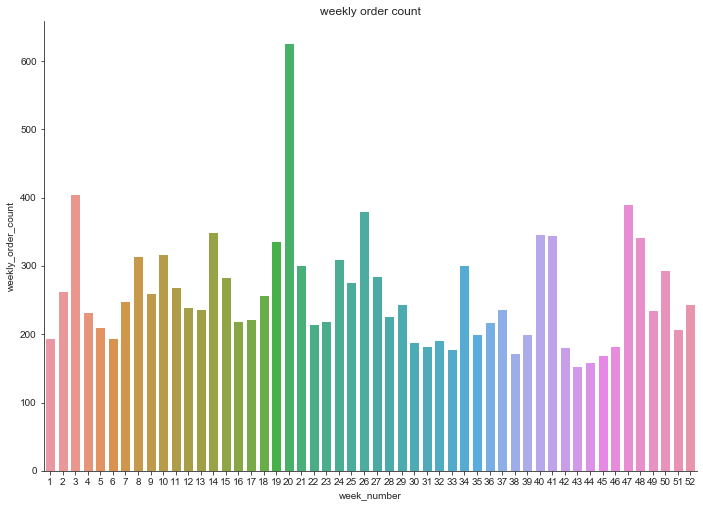

In [20]:
np.random.seed(0)
n, p = 40, 8
d = np.random.normal(0, 2, (n, p))
d += np.log(np.arange(1, p + 1)) * -5 + 10

sns.set_style('ticks')
fig, ax = plt.subplots()

fig.set_size_inches(11.7, 8.27)
sns.barplot(x='week_number',y='weekly_order_count',data=weekly_order_cnt, ax=ax)    
sns.despine()
plt.title('weekly order count')
plt.show()

### C) Compute the mean order value for gender 0 and for gender 1. 
### Do you think the difference is significant? Justify your choice of method.

In [21]:
# step-1: initial check on the mean order value for gender-0 and gender-1

In [22]:
data.groupby('gender')['value'].mean()

gender
0    363.890006
1    350.708361
Name: value, dtype: float64

In [23]:
data.groupby('gender')['customer_id'].count()

gender
0    6759
1    6712
Name: customer_id, dtype: int64

In [86]:
# step-2: The question only said to compare the mean order value for gender-0 and gender-1, so I assumed I am just asked to compare the mean values based on this dataset, not to estimate the difference of mean order value for these two genders in general.
# Since the number of both gender-0 and gender-1 are way more than 30, I choose Z-test to test if the difference is significant.

In [25]:
# step-3: before perform Z-test, create sub-datasets for each gender to check if the order value is normally distributed
gender_0=data[data['gender']==0]
gender_1=data[data['gender']==1]

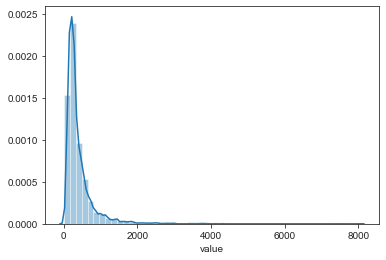

In [26]:
sns.distplot(gender_0['value'])

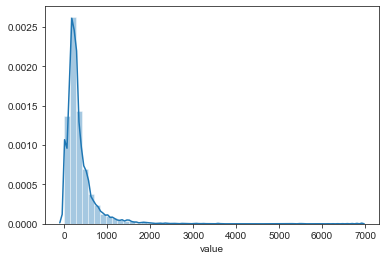

In [27]:
sns.distplot(gender_1['value'])

In [87]:
# step-4: The above two plots indicate that the order value for gender-0 and gender-1 is slight postive sknewness, but still can be
# considered as normally distributed, so it's valid perform Z-test now.

In [29]:
from scipy import stats
from statsmodels.stats import weightstats as stests

In [30]:
ztest ,pval = stests.ztest(gender_0['value'], gender_1['value'], value=0,alternative='two-sided')

In [31]:
print('ztest_score:',ztest,'p-value:',pval)

ztest_score: 1.9757691572170935 p-value: 0.04818092815493747


In [32]:
print(float(pval))
if pval<0.05:
    print("Conclusion:p-value is less than 0.05, reject null hypothesis, the difference of mean order value between gener-0 and gener-1 is siginificant")
else:
    print("Conclusion:p-value is more than 0.05, accept null hypothesis,the difference of mean order value between gener-0 and gener-1 is not siginificant")

0.04818092815493747
Conclusion:p-value is less than 0.05, reject null hypothesis, the difference of mean order value between gener-0 and gener-1 is siginificant


In [33]:
# Step-5: Conclusion: p value is less than 0.05, so I think the difference of mean order value between gener-0 and gener-1 is siginificant at 95% confidence level.

### D) Generate a confusion matrix for the gender predictions of customers in this dataset. 
### You should assume that there is only one gender prediction for each customer. 
### What does the confusion matrix tell you about the quality of the predictions?

In [34]:
# step-1: for this question, the only concern is 'customer', 'real gender' and 'predicted gender', so I created a subset for these three columns;
# and since there are customers occured more than once in the original data and only one gender prediction for each customer, to get more accurate result, 
# I dropped the dubplicated rows and only kept the 8814 unique records, each customer per row.

unique_customer=data.loc[:,['customer_id','gender','predicted_gender']]
unique_customer=unique_customer.drop_duplicates()

In [35]:
# step-2: generate the confusion matrix for gender prediction result
gender_confusion_matrix=pd.crosstab(unique_customer['gender'], unique_customer['predicted_gender'], rownames=['True'], colnames=['Predicted'], margins=True)

In [36]:
gender_confusion_matrix

Predicted,0,1,All
True,,,
0,2189,2218,4407
1,895,3512,4407
All,3084,5730,8814


In [37]:
# step-3: evaluate the quality of predictions
# In this dataset, the prediction result is "gender", which means we care both "correctly predicted Gender-0" and "correctly predicted Gender-1", 
# so I decided to calculate metrics based on the information in confusion matrix in following approaches: 
# 1) accuracy: the total proportion of correctly identified gener-0 and gender-1, which can use sklearn "accuracy_score" 
# 2) the precision score, recall score and F-1 score for gender-0
# 3) the precision score, recall score and F-1 score for gender-1

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
# 1) accuracy: the total proportion of "correctly predicted Gender-0" and "correctly predicted Gender-1"
print('total accuracy:',accuracy_score(unique_customer['gender'], unique_customer['predicted_gender']))

total accuracy: 0.6468118901747221


In [40]:
# 2) the precision score, recall score and F1 score for gender-0
precision_gender_0=2189/3084
recall_gender_0=2189/4407
f1_gender_0=2*precision_gender_0*recall_gender_0/(precision_gender_0+recall_gender_0)

In [41]:
print('precision score for gender-0:', precision_gender_0)
print('recall score for gender-0:', recall_gender_0)
print('F1 score for gender-0:', f1_gender_0)

precision score for gender-0: 0.709792477302205
recall score for gender-0: 0.4967097798956206
F1 score for gender-0: 0.5844346549192364


In [42]:
# 3) the precision score, recall score and F1 score for gender-1
precision_gender_1=3512/5730
recall_gender_1=3512/4407
f1_gender_1=2*precision_gender_1*recall_gender_1/(precision_gender_1+recall_gender_1)

In [43]:
print('precision score for gender-1:', precision_gender_1)
print('recall score for gender-1:', recall_gender_1)
print('F1 score for gender-1:', f1_gender_1)

precision score for gender-1: 0.612914485165794
recall score for gender-1: 0.7969140004538234
F1 score for gender-1: 0.6929071717470652


In [81]:
# Step 4: Conclusion
# According to the three metrics that calculated above, I think the overall quality of the gender prediction is just OK as the total proportion of correctly identified gender (both 1 and 0) is only 65%.
# The predicition quality of gender-1 is better than that of gender-0: althought the precision score of gener-0 is higher than that of gender-1,
# the proportion of correctly identified gender-1 in all true gender-1 is higher than that of gender-0; and the f1 score of gender-1 is also higher than that of gender-0.

### E) Describe one of your favorite tools or techniques and give a small example of how it's helped you solve a problem. 
### Limit your answer to one paragraph, and please be specific.

In [82]:
# Step-1: Answer statement
# Among all the data analysis techniques that I’ve learnt so far, one of my favorite is “correlation matrix”. “Correlation coefficient” is a very useful index for identifying highly related variables, 
# and “correlation matrix” can easily give me a full impression of all the variable’s’ correlation in a dataset.  
# This is very helpful in data exploration and modeling: firstly, if I have a high dimensional dataset and need to drop or combine features to reduce the dimension, 
# correlation matrix can give me a good reference. And identifying correlated features is especially important when building linear regression model because correlated features could bring collinearity problem; 
# secondly, when building linear regression model, sometimes I’ll use forward stepwise approach. In this circumstance, identifying the features that most closely related to the target value to build the initial model is very important and correlation matrix is very helpful.

In [88]:
# Step-2: Small example: build a regression model with the most important features that selected based on information in correlation matrix

In [89]:
# 1) The example data is a sales record from a real estate company
example=pd.read_csv('example.csv')

In [48]:
example.head()

,id,MSSubClass,MSZoning,LotFrontage,LotArea,LandContour,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,...,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,EnclosedPorch,MiscVal,MoSold,SalePrice
0,1,60,RL,65.0,8450,Lvl,5,2003,2003,Gable,...,854,0,1710,1,0,2,0,0,2,208500
1,2,20,RL,80.0,9600,Lvl,8,1976,1976,Gable,...,0,0,1262,0,1,2,0,0,5,181500
2,3,60,RL,68.0,11250,Lvl,5,2001,2002,Gable,...,866,0,1786,1,0,2,0,0,9,223500
3,4,70,RL,60.0,9550,Lvl,5,1915,1970,Gable,...,756,0,1717,1,0,1,272,0,2,140000
4,5,60,RL,84.0,14260,Lvl,5,2000,2000,Gable,...,1053,0,2198,1,0,2,0,0,12,250000


In [49]:
example.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30 non-null     int64  
 1   MSSubClass     30 non-null     int64  
 2   MSZoning       30 non-null     object 
 3   LotFrontage    25 non-null     float64
 4   LotArea        30 non-null     int64  
 5   LandContour    30 non-null     object 
 6   OverallCond    30 non-null     int64  
 7   YearBuilt      30 non-null     int64  
 8   YearRemodAdd   30 non-null     int64  
 9   RoofStyle      30 non-null     object 
 10  MasVnrArea     30 non-null     int64  
 11  ExterQual      30 non-null     object 
 12  ExterCond      30 non-null     object 
 13  Heating        30 non-null     object 
 14  HeatingQC      30 non-null     object 
 15  CentralAir     30 non-null     object 
 16  Electrical     30 non-null     object 
 17  1stFlrSF       30 non-null     int64  
 18  2ndFlrSF    

In [50]:
example['LotFrontage'].mean()

71.0

In [51]:
example['LotFrontage']=example['LotFrontage'].fillna(71.0)

In [52]:
# 2) build initial regression model with all features in the example dataset and check the adjusted R squre

In [53]:
X=example.drop('SalePrice',axis=1)
X=pd.get_dummies(X)
y=example['SalePrice']

In [54]:
import statsmodels.regression.linear_model as sm

In [55]:
regressor_OLS = sm.OLS(endog = y, exog = X).fit() 


In [83]:
print('Adjusted R square of initial model:',regressor_OLS.rsquared_adj)

Adjusted R square of initial model: 0.7084204562854586


In [57]:
# 3) plot correlation matrix to identify the most important features

In [58]:
example2=pd.get_dummies(example)

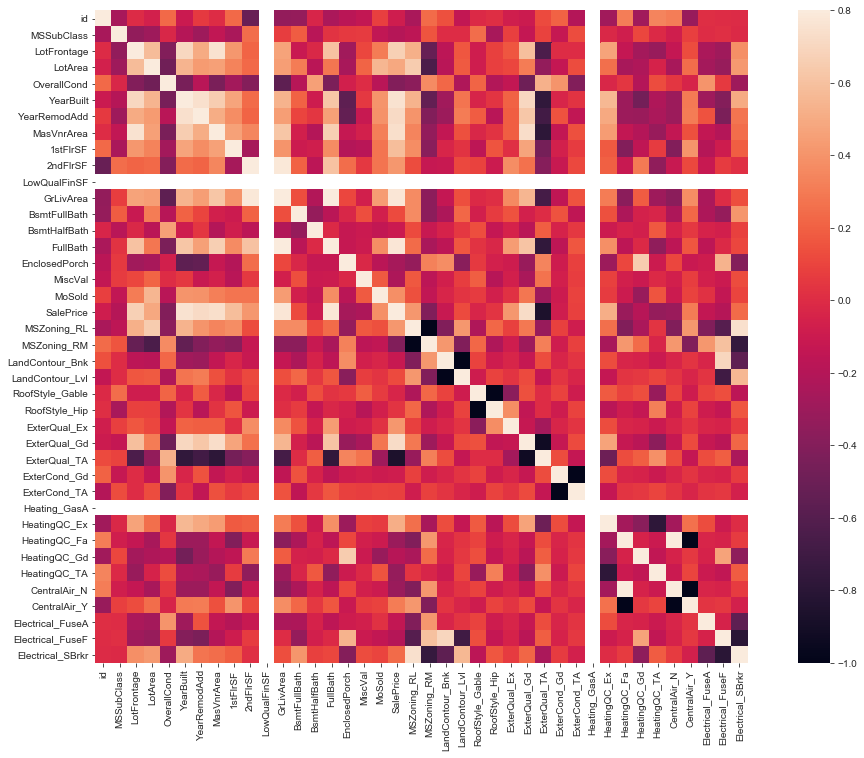

In [59]:
corrmat = example2.corr()
 
f, ax = plt.subplots(figsize=(18, 12))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [60]:
# 4) From the above plot, I found there are six features that has high correlation with "SalePrice", such as ExterQual_Ex and FullBath
# so I select these six features to create a new model

In [61]:
k=7
corrmat.nlargest(k, 'SalePrice')['SalePrice']

SalePrice       1.000000
FullBath        0.776949
GrLivArea       0.773462
YearBuilt       0.757410
MasVnrArea      0.743221
ExterQual_Gd    0.726729
YearRemodAdd    0.717199
Name: SalePrice, dtype: float64

In [62]:
X2=example2.loc[:,['FullBath','GrLivArea','YearBuilt','MasVnrArea','ExterQual_Gd','YearRemodAdd']]


In [63]:
regressor_OLS2 = sm.OLS(endog = y, exog = X2).fit() 

In [84]:
print('Adjusted R square of optimized model:',regressor_OLS2.rsquared_adj)

Adjusted R square of optimized model: 0.96259317004572


In [90]:
# 5) The optimized model with the six most closely related features, the adjusted R square got a significant improvement

In [91]:
# 6) I plot a correlaion matrix with the selected six features and found they have correlated with each other too. 
# This could bring collinearity problem, in the future work, I might test Ridge regression to optimize the modeling again.

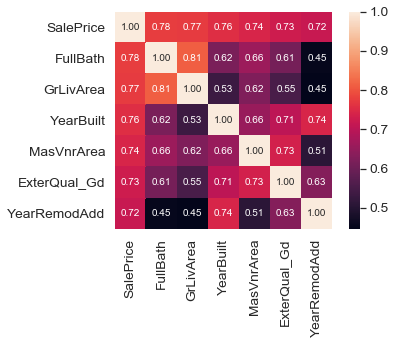

In [67]:
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(example2[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)